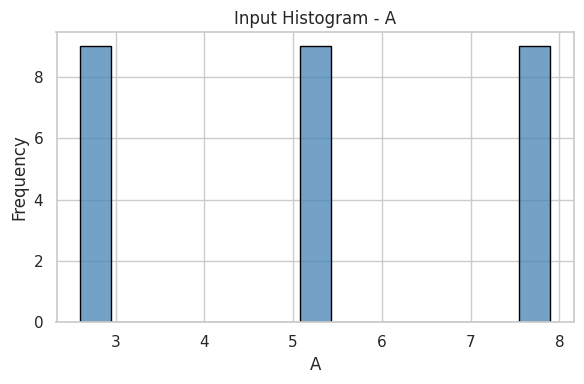

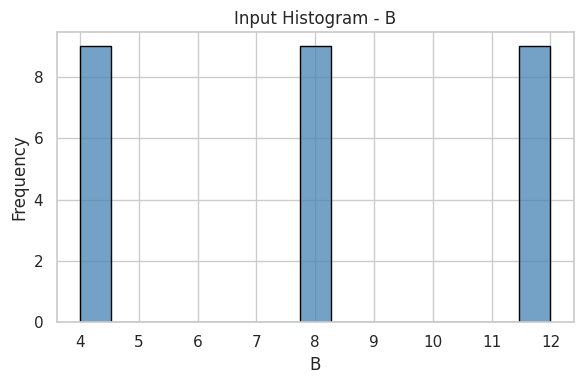

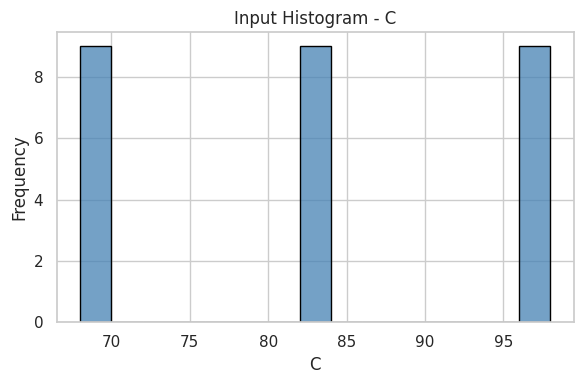

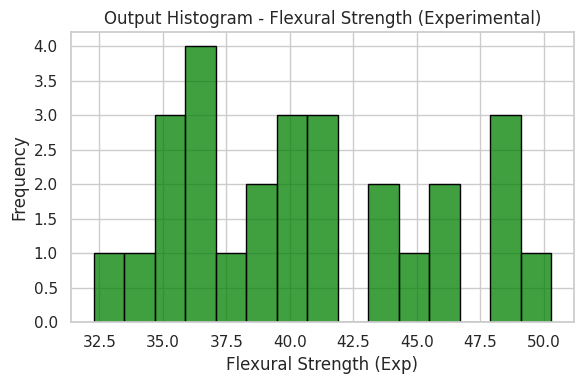

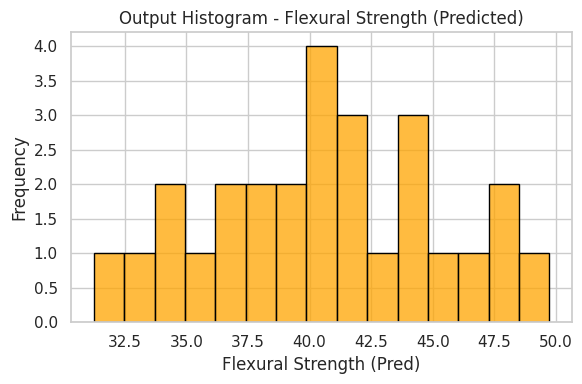

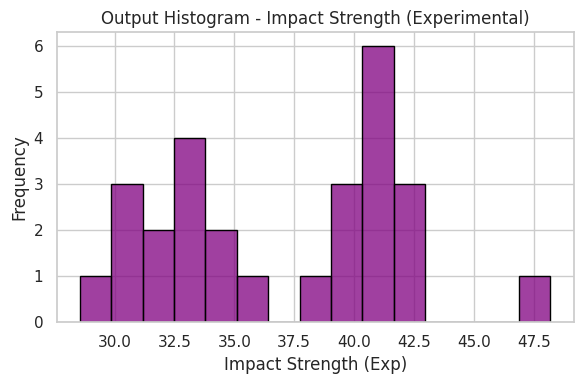

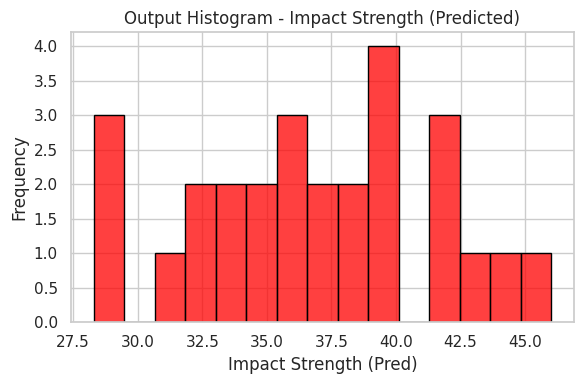

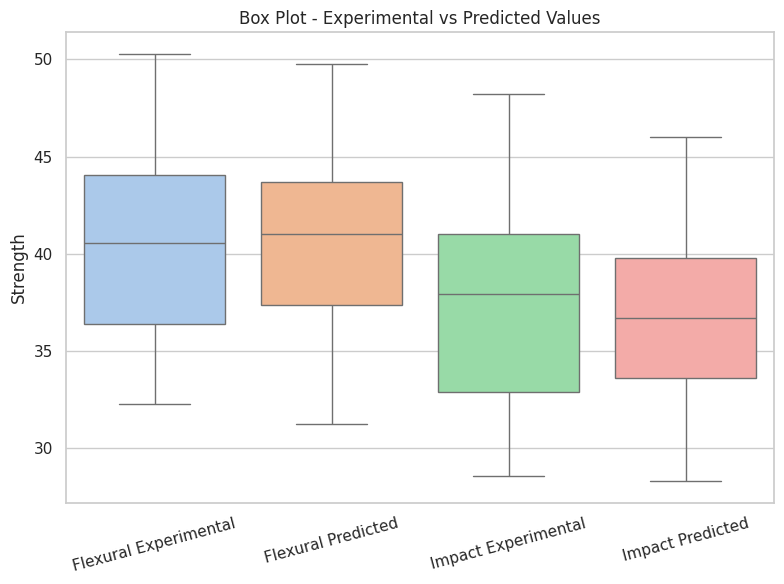

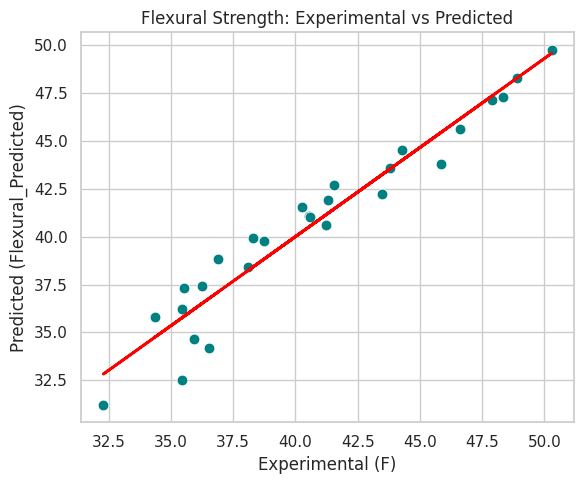

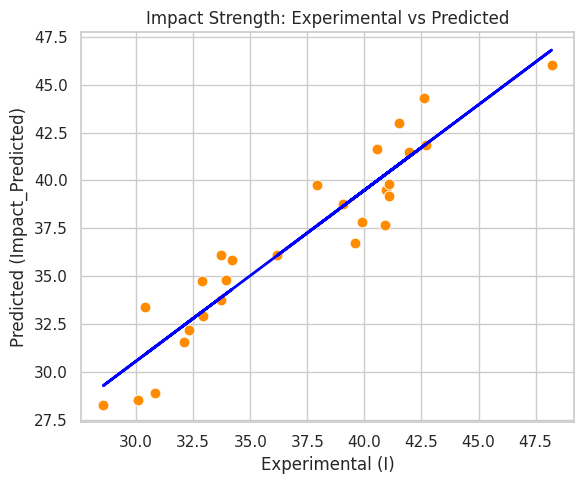

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("hybrid_composites_with_predictions.csv")

# Set style
sns.set(style="whitegrid")

# -------------------------------
# 1. Input Histograms (A, B, C)
# -------------------------------
input_cols = ['A', 'B', 'C']
for col in input_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=15, kde=False, color='steelblue', edgecolor='black')
    plt.title(f'Input Histogram - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# --------------------------------------------
# 2. Separate Output Histograms (No KDE)
# --------------------------------------------

# Flexural Experimental
plt.figure(figsize=(6,4))
sns.histplot(df['F'], bins=15, kde=False, color='green', edgecolor='black')
plt.title('Output Histogram - Flexural Strength (Experimental)')
plt.xlabel('Flexural Strength (Exp)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Flexural Predicted
plt.figure(figsize=(6,4))
sns.histplot(df['Flexural_Predicted'], bins=15, kde=False, color='orange', edgecolor='black')
plt.title('Output Histogram - Flexural Strength (Predicted)')
plt.xlabel('Flexural Strength (Pred)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Impact Experimental
plt.figure(figsize=(6,4))
sns.histplot(df['I'], bins=15, kde=False, color='purple', edgecolor='black')
plt.title('Output Histogram - Impact Strength (Experimental)')
plt.xlabel('Impact Strength (Exp)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Impact Predicted
plt.figure(figsize=(6,4))
sns.histplot(df['Impact_Predicted'], bins=15, kde=False, color='red', edgecolor='black')
plt.title('Output Histogram - Impact Strength (Predicted)')
plt.xlabel('Impact Strength (Pred)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --------------------------------------------
# 3. Boxplots - Experimental vs Predicted
# --------------------------------------------
plt.figure(figsize=(8,6))
data_box = pd.DataFrame({
    'Flexural Experimental': df['F'],
    'Flexural Predicted': df['Flexural_Predicted'],
    'Impact Experimental': df['I'],
    'Impact Predicted': df['Impact_Predicted']
})
sns.boxplot(data=data_box, palette='pastel')
plt.title('Box Plot - Experimental vs Predicted Values')
plt.ylabel('Strength')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 4. Experimental vs Predicted Scatter Plots
# --------------------------------------------

# Flexural Strength
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['F'], y=df['Flexural_Predicted'], color='teal', s=60)
# Linear regression line
m, b = np.polyfit(df['F'], df['Flexural_Predicted'], 1)
plt.plot(df['F'], m*df['F'] + b, color='red', linewidth=2)
plt.title('Flexural Strength: Experimental vs Predicted')
plt.xlabel('Experimental (F)')
plt.ylabel('Predicted (Flexural_Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Impact Strength
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['I'], y=df['Impact_Predicted'], color='darkorange', s=60)
# Linear regression line
m, b = np.polyfit(df['I'], df['Impact_Predicted'], 1)
plt.plot(df['I'], m*df['I'] + b, color='blue', linewidth=2)
plt.title('Impact Strength: Experimental vs Predicted')
plt.xlabel('Experimental (I)')
plt.ylabel('Predicted (Impact_Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()


R² Values:
Flexural Strength  : 0.9297
Impact Strength    : 0.8862


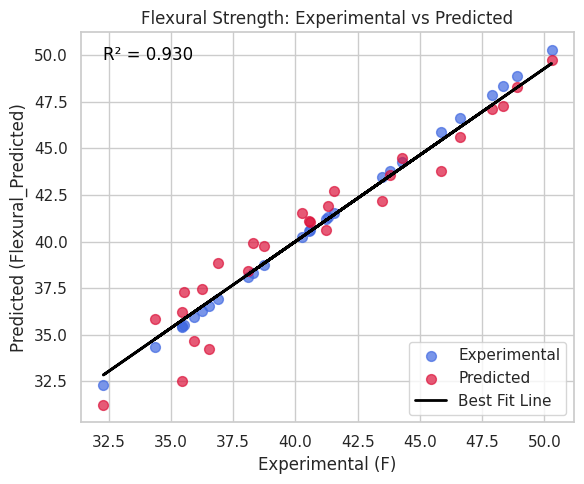

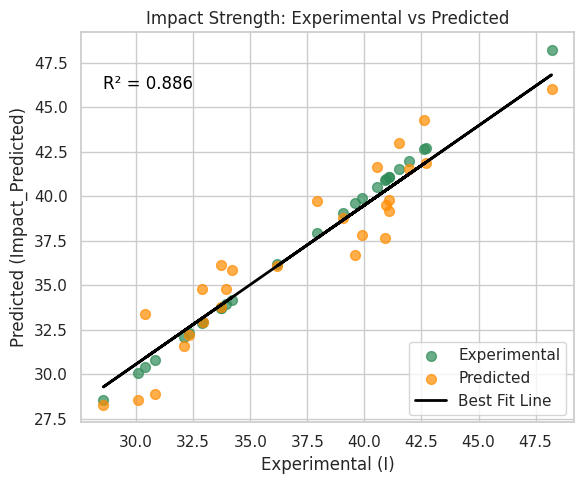

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("hybrid_composites_with_predictions.csv")

# Set plot style
sns.set(style="whitegrid")

# --------------------------------------------
# 1. Calculate R² values
# --------------------------------------------
r2_flexural = r2_score(df['F'], df['Flexural_Predicted'])
r2_impact = r2_score(df['I'], df['Impact_Predicted'])

print("R² Values:")
print(f"Flexural Strength  : {r2_flexural:.4f}")
print(f"Impact Strength    : {r2_impact:.4f}")

# --------------------------------------------
# 2. Scatter Plots with R² Displayed
# --------------------------------------------

# Flexural Strength
plt.figure(figsize=(6,5))
# Plot experimental points
plt.scatter(df['F'], df['F'], color='royalblue', label='Experimental', s=50, alpha=0.7)
# Plot predicted points
plt.scatter(df['F'], df['Flexural_Predicted'], color='crimson', label='Predicted', s=50, alpha=0.7)
# Regression line for predicted
m, b = np.polyfit(df['F'], df['Flexural_Predicted'], 1)
plt.plot(df['F'], m*df['F'] + b, color='black', linewidth=2, label='Best Fit Line')
plt.title('Flexural Strength: Experimental vs Predicted')
plt.xlabel('Experimental (F)')
plt.ylabel('Predicted (Flexural_Predicted)')
plt.text(min(df['F']), max(df['Flexural_Predicted']),
         f'R² = {r2_flexural:.3f}', fontsize=12, color='black')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Impact Strength
plt.figure(figsize=(6,5))
# Plot experimental points
plt.scatter(df['I'], df['I'], color='seagreen', label='Experimental', s=50, alpha=0.7)
# Plot predicted points
plt.scatter(df['I'], df['Impact_Predicted'], color='darkorange', label='Predicted', s=50, alpha=0.7)
# Regression line for predicted
m, b = np.polyfit(df['I'], df['Impact_Predicted'], 1)
plt.plot(df['I'], m*df['I'] + b, color='black', linewidth=2, label='Best Fit Line')
plt.title('Impact Strength: Experimental vs Predicted')
plt.xlabel('Experimental (I)')
plt.ylabel('Predicted (Impact_Predicted)')
plt.text(min(df['I']), max(df['Impact_Predicted']),
         f'R² = {r2_impact:.3f}', fontsize=12, color='black')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
